In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [3]:
# set configuration
sample_size = 100
nr_sample = 20
nr_moments = 6

### Bounded distributions

In [7]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [8]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,arcsine


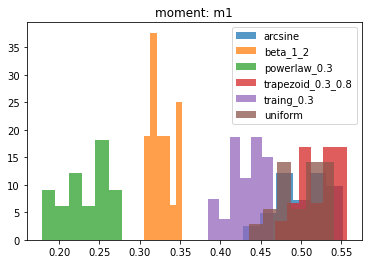

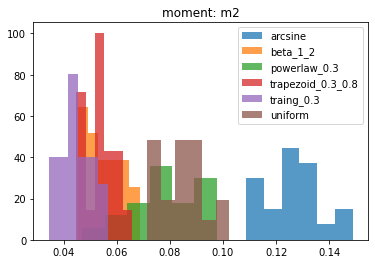

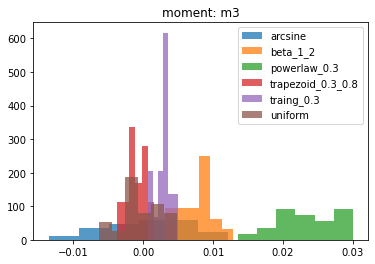

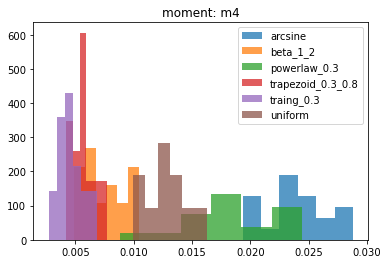

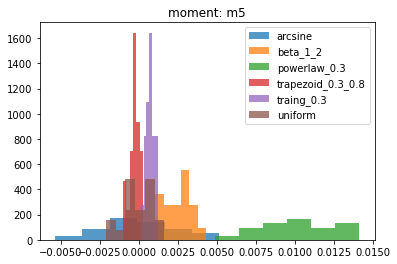

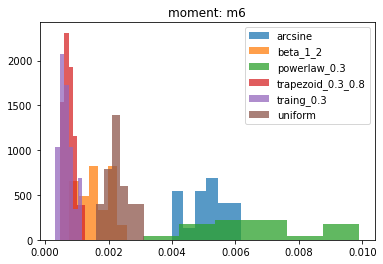

In [70]:
dem.get_histogram_of_moments(moments_df)

In [10]:
test_size = 0.2
cv = 5

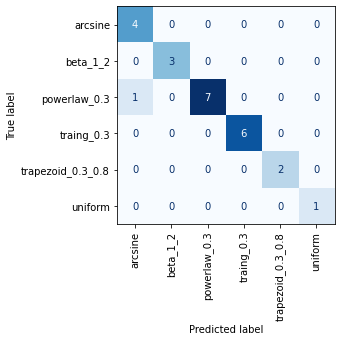

array([1., 1., 1., 1., 1.])

In [72]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [25]:
# testing number of smaples vs accuracy
sample_list = list(range(10,61,10))
moments_list = list(range(2,11))
acc_mean, acc_std = cm.cv_svm_moments_samples(heavytail_dists, sample_list, moments_list)


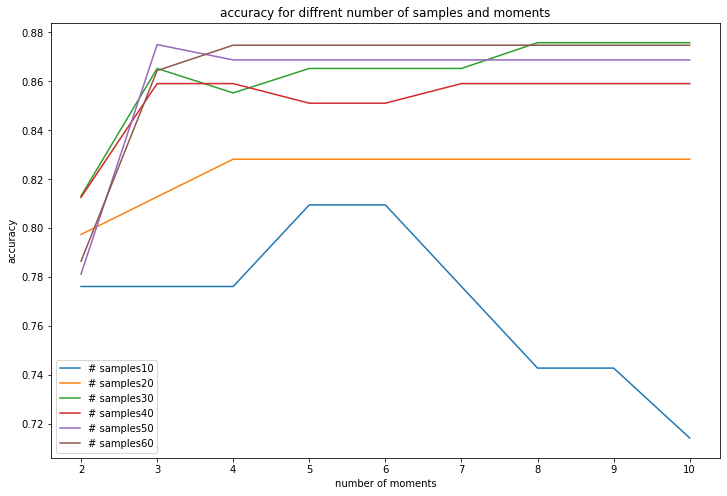

In [26]:
plt.figure(figsize=(12, 8))
for i in range(len(acc_mean)):
    plt.plot(nr_moments_list, acc_mean[i], label=('# samples'+ str(nr_sample_list[i])))
    plt.title('accuracy for diffrent number of samples and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend()

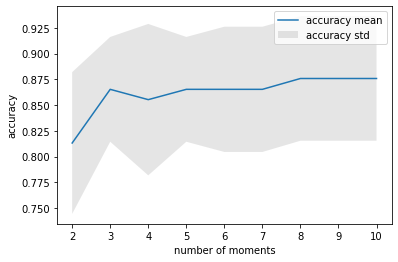

In [28]:
ax = plt.gca()
plt.plot(nr_moments_list,acc_mean[2], label='accuracy mean')

plt.gca().fill_between(nr_moments_list,
                       [i-j for i,j in zip(acc_mean[2], acc_std[2])], 
                       [i+j for i,j in zip(acc_mean[2], acc_std[2])],
                       facecolor='gray', 
                       alpha=0.2,
                       label='accuracy std')

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend();

### Heavytail distributions

In [6]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [107]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,2.694987,43.363212,1536.514722,6.622916e+04,3.006032e+06,1.408291e+08,cauchy
1,1.678578,9.860843,205.852969,5.452013e+03,1.468516e+05,3.976253e+06,cauchy
2,3.143346,46.276931,1788.363833,9.051834e+04,4.787007e+06,2.575174e+08,cauchy
3,3.546117,194.855215,22774.533517,2.933098e+06,3.821316e+08,4.991683e+10,cauchy
4,2.835260,24.799479,498.591383,1.382007e+04,4.081871e+05,1.260643e+07,cauchy


In [113]:
transformed_sampels = dict()
for name, samples in heavytail_samples.items():
    transformed_sampels[name] = np.log1p(samples)
    
moments_df = dem.get_moments_df(transformed_sampels, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,0.856877,0.552635,0.748622,2.125040,5.403208,15.071385,cauchy
1,0.751252,0.339962,0.267032,0.698255,1.472459,3.699299,cauchy
2,0.961129,0.651867,0.673340,1.947710,4.503151,12.425193,cauchy
3,0.848664,0.650846,1.137941,4.057456,13.942702,52.095567,cauchy
4,0.966389,0.571285,0.499312,1.356046,2.577080,6.061882,cauchy


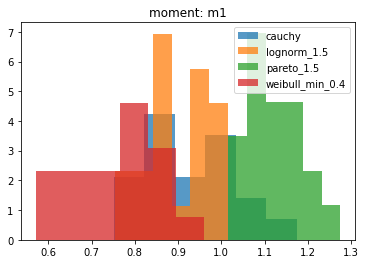

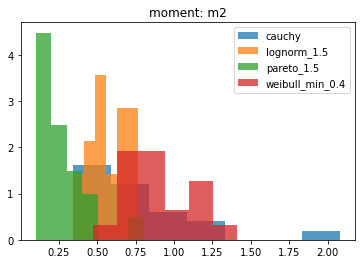

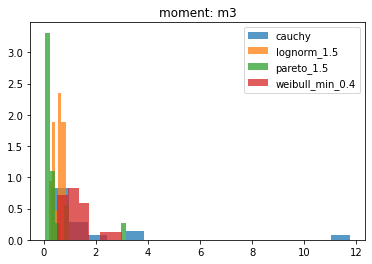

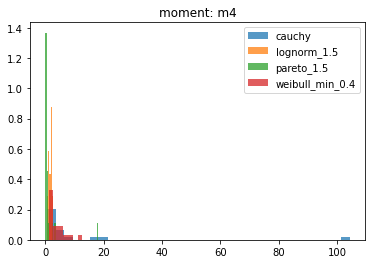

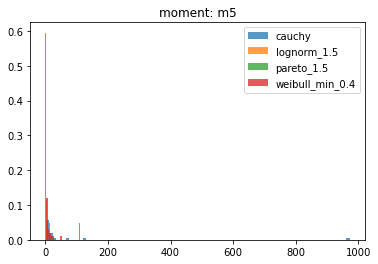

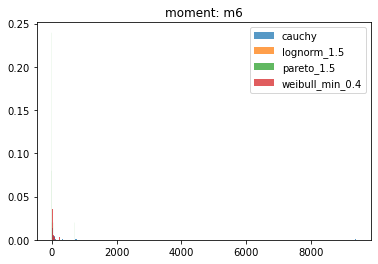

In [114]:
dem.get_histogram_of_moments(moments_df)

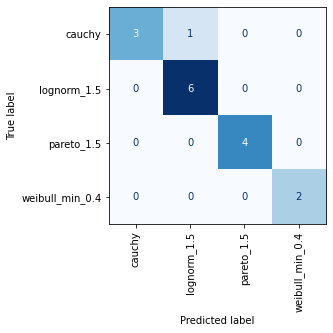

array([0.69230769, 0.76923077, 0.92307692, 0.92307692, 0.83333333])

In [115]:
cm.svm_model(moments_df, test_size, cv, plot=1)

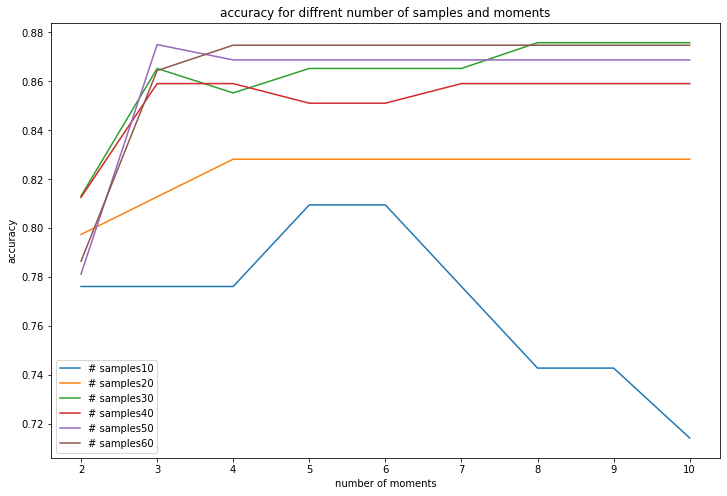

In [21]:
# testing number of smaples vs accuracy
sample_list = list(range(10,61,10))
moments_list = list(range(2,11))
acc_mean, acc_std = cv_svm_moments_samples(heavytail_dists, sample_list, moments_list)

plt.figure(figsize=(12, 8))
for i in range(len(acc_mean)):
    plt.plot(nr_moments_list, acc_mean[i], label=('# samples'+ str(nr_sample_list[i])))
    plt.title('accuracy for diffrent number of samples and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend()

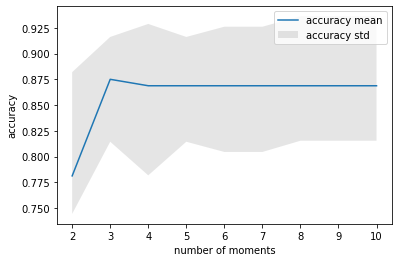

In [24]:
#plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_moments_list,acc_mean[4], label='accuracy mean')

plt.gca().fill_between(nr_moments_list,
                       [i-j for i,j in zip(acc_mean[2], acc_std[2])], 
                       [i+j for i,j in zip(acc_mean[2], acc_std[2])],
                       facecolor='gray', 
                       alpha=0.2,
                       label='accuracy std')

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.legend();